<div align="right"><font face="Tahoma" size="5" color=blue>تمرین 5 درس تحلیل داده</font></div>

<div align="right"><font face="Tahoma" size="4" color=blue>مهیار ملکی</font></div>
<div align="right"><font face="Tahoma" size="4" color=blue>شماره دانشجویی : 810100476</font></div>

---
---

In [1]:
from persiantools.jdatetime import JalaliDate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

<div dir="rtl" lang="fa"><font face="Tahoma" size="5" color='#ff00ff'>بخش اول</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="4" color='#00B0F0'>تمیز کردن داده</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>تمیزسازیهایی که داده نیاز دارد را انجام دهید و هر کدام را شرح و علت آن را بیان کنید.
</font></div>

In [2]:
transactions_df = pd.read_csv('Transactions.csv')
transactions_df.head()

,UserID,Date,Time,Paid Amount,ChannelID
0,37087,13980324,210341,623100,1.0
1,88681,13980104,10617,420000,2.0
2,3617,13980113,223052,390000,3.0
3,111638,13980305,171649,3375000,4.0
4,2216,13980315,222211,660000,5.0


In [3]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206664 entries, 0 to 206663
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   UserID       206664 non-null  int64  
 1   Date         206664 non-null  int64  
 2   Time         206664 non-null  int64  
 3   Paid Amount  206664 non-null  int64  
 4   ChannelID    206460 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 7.9 MB


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>در ستون channelID تعدادی مقادیر Nan وجود دارد، لذا در ادامه برای مرج کردن با جدول channels نحوه مرج را outer انتخاب می کنیم تا سطرهایی که NaN دارند حذف نشوند. در آینده نیز اگر نیاز شد نسبت به این مقادیر NaN تصمیماتی اتخاذ خواهیم کرد.</font></div>

In [4]:
channels_df = pd.read_csv('Channels.csv')
transactions_df = transactions_df.merge(channels_df, on='ChannelID', how='outer')
transactions_df.head()

,UserID,Date,Time,Paid Amount,ChannelID,ChannelName
0,37087,13980324,210341,623100,1.0,Antlia
1,33768,13980320,122410,1372000,1.0,Antlia
2,68294,13980219,125220,680000,1.0,Antlia
3,94189,13980206,212431,306000,1.0,Antlia
4,34876,13980124,83230,95000,1.0,Antlia


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>در ادامه فرمت ستون تاریخ و زمان را درست میکنیم تا نمایش درستی داشته باشند، همچین می توانیم ستونی برای ماه ها در نظر بگیریم تا در ادامه از آن استفاده کنیم. (علاوه بر این می توان ستونی برای معادل میلادی تاریخ نیز در نظر بگیریم تا درصورت نیاز در ادامه استفاده شود. این کار اینجا داخل # قرار گرفته و انجام نشده است)</font></div>

In [5]:
# transactions_df['date_miladi'] = transactions_df.Date.apply(lambda x: pd.to_datetime(JalaliDate(int(x[:4]),int(x[4:6]),int(x[6:])).to_gregorian()))
transactions_df.Time = transactions_df.Time.apply(lambda x: str(x)[:-4] + ':' + str(x)[-4:-2] + ':' + str(x)[-2:])
transactions_df.Date = transactions_df.Date.apply(lambda x: str(x)[:-4] + '-' + str(x)[-4:-2] + '-' + str(x)[-2:])
transactions_df['months'] = transactions_df.Date.str.rsplit('-', n=1, expand=True)[0]
transactions_df.head()

,UserID,Date,Time,Paid Amount,ChannelID,ChannelName,months
0,37087,1398-03-24,21:03:41,623100,1.0,Antlia,1398-03
1,33768,1398-03-20,12:24:10,1372000,1.0,Antlia,1398-03
2,68294,1398-02-19,12:52:20,680000,1.0,Antlia,1398-02
3,94189,1398-02-06,21:24:31,306000,1.0,Antlia,1398-02
4,34876,1398-01-24,8:32:30,95000,1.0,Antlia,1398-01


---
<div dir="rtl" lang="fa"><font face="Tahoma" size="4" color='#00B0F0'>محاسبه متریک</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>1. تعداد و ارزش تراکنش های روزانه برای 3 ماه اخیر</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>ابتدا مقادیر روزانه تعداد و ارزش تراکنش ها را با دستور groupby محاسبه کرده و سپس یک دیتا فریم از مقادیر به دست آمده درست می کنیم</font></div>

In [6]:
Sum = transactions_df.groupby('Date').sum()
Count = transactions_df.groupby('Date').count()

In [7]:
transactions_per_day = pd.DataFrame([Sum['Paid Amount'], Count['Paid Amount']], index=['paid_sum', 'paid_count'])
transactions_per_day = transactions_per_day.transpose().reset_index()
transactions_per_day.head()

,Date,paid_sum,paid_count
0,1398-01-01,641542750,589
1,1398-01-02,627763750,566
2,1398-01-03,645186630,619
3,1398-01-04,691234660,738
4,1398-01-05,679026600,677


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>ستون جدیدی با نام months برای محاسبات راحتتر ایجاد میکنیم. آخرین i تا مقدار یونیک ستون months  را (i=3) فراخوانی میکنیم تا مقادیر متناظر با آنها را بدست آوریم</font></div>

In [8]:
i = 3
transactions_per_day['months'] = transactions_per_day.Date.str.split('-', expand=True)[1]
months = transactions_per_day['months'].unique()[-i:]
last_3_months = transactions_per_day[transactions_per_day['months'].isin(months)].drop(columns='months').reset_index(drop=True)
last_3_months.head()

,Date,paid_sum,paid_count
0,1398-10-01,88480450,125
1,1398-10-02,197577900,241
2,1398-10-03,135747950,198
3,1398-10-04,207937550,273
4,1398-10-05,302773730,401


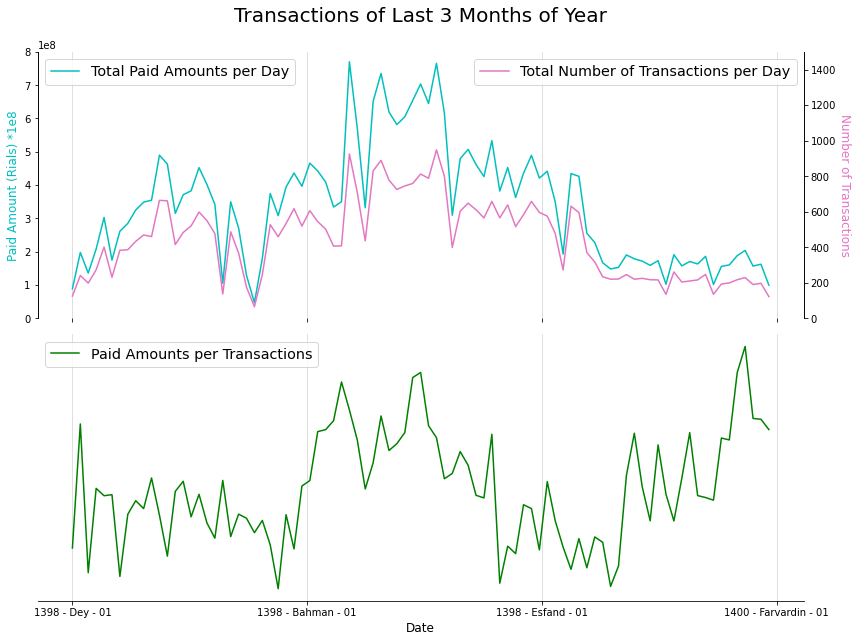

In [9]:
fig, ax = plt.subplots(2, figsize=(12,9), sharex=True)

plt1 = ax[0]
plt1.plot(last_3_months.paid_sum, 'c', label='Total Paid Amounts per Day')
plt1.set_ylabel('Paid Amount (Rials) *1e8', color='c', fontsize=12)
plt1.set_ylim(0,8e8)
plt1.spines['top'].set_visible(False)
plt1.spines['bottom'].set_visible(False)
plt1.set_title('Transactions of Last 3 Months of Year', pad=30, fontsize=20)
plt1.legend(loc=2, fontsize='x-large')
plt1.grid(axis='x', alpha=0.5)

plt2 = ax[0].twinx()
plt2.plot(last_3_months.paid_count, 'tab:pink', label='Total Number of Transactions per Day')
plt2.set_ylabel('Number of Transactions', color='tab:pink', fontsize=12, labelpad=15, rotation=-90)
plt2.set_ylim(0,1500)
plt2.spines['top'].set_visible(False)
plt2.spines['bottom'].set_visible(False)
plt2.legend(loc=1, fontsize='x-large')

plt3 = ax[1]
plt3.plot(last_3_months.paid_sum/last_3_months.paid_count, 'g', label='Paid Amounts per Transactions')
plt3.set_xticks(np.linspace(0,89,4))
plt3.set_xticklabels(['1398 - Dey - 01','1398 - Bahman - 01','1398 - Esfand - 01','1400 - Farvardin - 01'])
plt3.set_xlabel('Date', fontsize=12)
plt3.axes.get_yaxis().set_visible(False)
plt3.spines['top'].set_visible(False)
plt3.spines['right'].set_visible(False)
plt3.spines['left'].set_visible(False)
plt3.legend(fontsize='x-large', loc=2)
plt3.grid(axis='x', alpha=0.5)

plt.tight_layout(pad=1);

<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>با توجه به نمودار اول متوجه می شویم که در بهمن ماه تعداد و ارزش کلی تراکنش ها افزایش یافته است که احتمالا بیانگر خرید های آخر سال افراد است که در این ماه به اوج می رسد اما این روند افزایشی با گذشت زمان کاهش یافته و در اسفند ماه به روندی کاهشی تبدیل شده است. </font></div>
<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>در نمودار دوم ارزش تراکنش ها به ازای هر ترکانش محاسبه شده است و نکته مهم آن است که علاوه بر بالا بودن این مقدار در بهمن ماه، این مقدار در اسفند نیز افزایش می یابد یعنی با وجود کاهش تعداد تراکنش ها در اسفند ارزش آنها ولی افزایش می یاید.</font></div>

---
<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>2. تعداد مشتریان ماهانه</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>با گروه بندی بر اساس ماه ها و اجرای تابع nunique تعداد مشتریان یونیک هر ماه را بدست می آوریم.</font></div>

In [10]:
num_costumers = transactions_df.groupby('months').nunique().reset_index()[['months','UserID']]
num_costumers.rename(columns={'UserID':'users'}, inplace=True)
num_costumers

,months,users
0,1398-01,11808
1,1398-02,9234
2,1398-03,13299
3,1398-04,19443
4,1398-05,19452
5,1398-06,19652
6,1398-07,13081
7,1398-08,15627
8,1398-09,9368
9,1398-10,9628


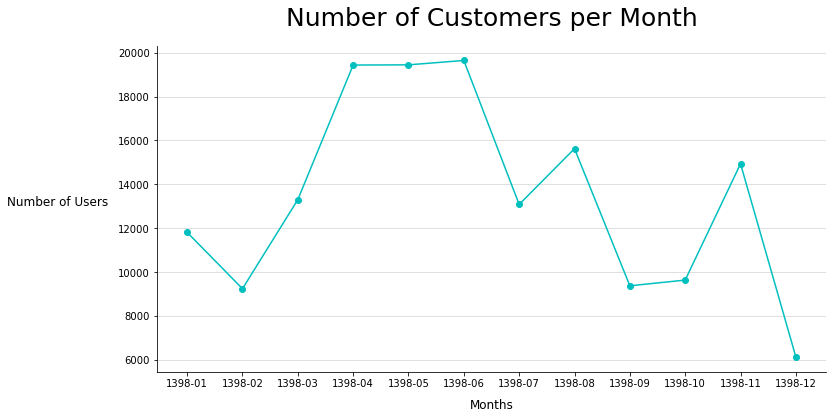

In [11]:
plt.figure(figsize=(12,6))
plt.plot(num_costumers.months, num_costumers.users, marker='o', color='c')

plt.xlabel('Months', fontsize=12, labelpad=10)
plt.ylabel('Number of Users', fontsize=12, rotation=0, labelpad=60)

plt.grid(axis='y', alpha=0.5)
plt.title('Number of Customers per Month', fontsize=25, pad=20)
sns.despine(right=True);

<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>با توجه به نمودار متوجه می شویم که تعداد کاربران در سه ماهه تابستان بیشترین مقدار خود را داشته و در هر ماه تابستان نزدیک 20000 نفر می باشد، این امر می تواند نتیجه تبلیغات بیشتر و دیده شدن بیشتر آن تبلیغات باشد زیرا در تابستان افراد بیشتری در معرض تبلیغات قرار می گیرند. این روند تا قبل از تابستان صعودی بوده و بعد از آن تا آخر سال تقریبا نزولی می باشد و در اسفند به کمترین مقدار خود می رسد. پس از سه ماهه تابستان به ترتیب ماه های آبان و بهمن دارای بیشترین تعداد مشتریان هستند.</font></div>

---
<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>3. درآمد هفتگی ( فرض کنید ۱۰ درصد هر تراکنش را به عنوان کارمزد دریافت کنیم )
</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>از جدول تراکنش های روزانه به دست آمده در سوال 1 استفاده می کنیم</font></div>

In [12]:
transactions_per_day.head()

,Date,paid_sum,paid_count,months
0,1398-01-01,641542750,589,01
1,1398-01-02,627763750,566,01
2,1398-01-03,645186630,619,01
3,1398-01-04,691234660,738,01
4,1398-01-05,679026600,677,01


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>مجموع ارزش تراکنش ها در بازه های 7 روزه را از اولین تاریخ موجود به دست می آوریم.(اولین روز هر بازه را به عنوان نماینده آن هفته در نظر می گیریم) سپس مقادیر به دست آمده را در 0.1 ضرب کرده تا کارمزد تراکنش ها و در نتیجه درامد بانک به دست آید. محاسبات انجام شده را داخل یک دیتا فریم جدید می ریزیم.</font></div>

In [13]:
weekly_pay = transactions_per_day.groupby(transactions_per_day.index // 7).sum()['paid_sum']
week_first_day = transactions_per_day.groupby(transactions_per_day.index // 7).first()['Date']

weekly_income = pd.DataFrame([week_first_day, weekly_pay * 0.1]).transpose()
weekly_income.head()

,Date,paid_sum
0,1398-01-01,456536287.0
1,1398-01-08,382749000.0
2,1398-01-15,187017856.0
3,1398-01-22,144907430.0
4,1398-01-29,179171955.0


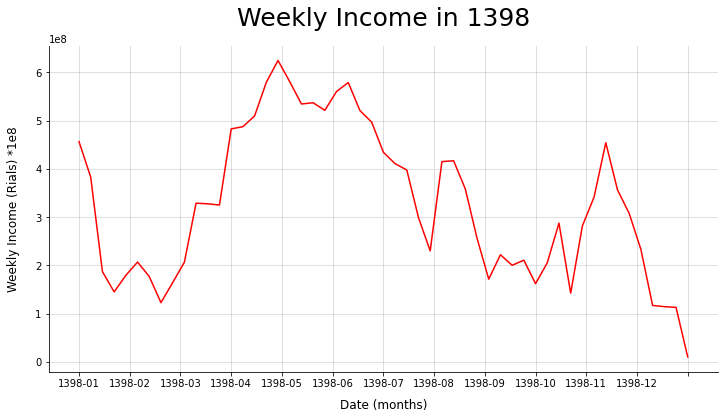

In [14]:
months = num_costumers.months.to_list()
months.append('')

plt.figure(figsize=(12,6))

plt.plot(weekly_income.paid_sum, color='r')
plt.xticks(np.linspace(0,52,13), months)

plt.xlabel('Date (months)', fontsize=12, labelpad=10)
plt.ylabel('Weekly Income (Rials) *1e8', fontsize=12, labelpad=15)
plt.title('Weekly Income in 1398', fontsize=25, pad=20)

plt.grid(alpha=0.5)
sns.despine(right=True);

<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>مشابه سوال قبلی مشاهده می شود که در همان فصل تابستان که تعداد مشتریان به حداکثر مقدار خود رسیده بود در اینجا هم درآمد هفتگی در این بازه زمانی حداکثر مقدار خود را در میان ماه های دیگر سال دارا می باشد. همچنین ماه های بهمن، فروردین و آبان نیز در رتبه های بعدی قرار داردند و در اسفند نیز به حداقل مقدار درامد میرسیم.</font></div>

---
<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>4. محاسبه نرخ ماندگاری ماهانه</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>ابتدا جدولی مختص یوزرها و ماهی که تراکنش در آن صورت گرفته ساخته و بر اساس تاریخ تراکنش مرتب می کنیم.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'></font></div>

In [15]:
users = transactions_df.sort_values('Date').reset_index(drop=True)[['UserID', 'months']]
users.head()

,UserID,months
0,57563,1398-01
1,65236,1398-01
2,35842,1398-01
3,98419,1398-01
4,98419,1398-01


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>براساس فرمول $Retention Rate = \frac{E-N}{S}\times 100$ درصد ماندگاری ماهیانه کاربران را برای هر ماه محاسبه می کنیم(E: کل یوزرهای این ماه، N:یوزرهای جدید این ماه، S: یوزرهای ماه گذشته) این مقدار را برای اولین ماه صفر در نظر می گیریم</font></div>

In [16]:
RR = [0]
first_month = users[users.months == users.months.unique()[0]]

for month in users.months.unique()[1:]:
    second_month = users[users.months == month]
    intersect = second_month.merge(first_month, on='UserID', how='inner')
    E_N = intersect.UserID.nunique()
    S = first_month.UserID.nunique()
    rr = 100 * E_N/S
    RR.append(rr)
    first_month = users[users.months == month]

ret_rate = pd.DataFrame({'month':users.months.unique(), 'retention_rate':RR})
ret_rate

,month,retention_rate
0,1398-01,0.000000
1,1398-02,10.865515
2,1398-03,19.579814
3,1398-04,20.309798
4,1398-05,17.399578
5,1398-06,17.684557
6,1398-07,13.357419
7,1398-08,17.720358
8,1398-09,12.977539
9,1398-10,16.300171


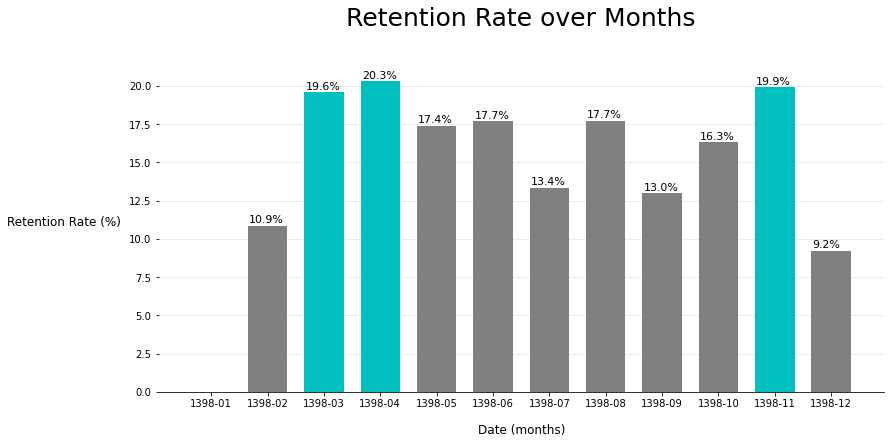

In [17]:
fig, ax = plt.subplots(figsize=(13,6))

colors = ['c' if (bar in ret_rate.retention_rate.nlargest(3).values) else 'grey' for bar in ret_rate.retention_rate]
ax.bar(ret_rate.month, ret_rate.retention_rate, width=0.7, color=colors, alpha=1, zorder=2)
plt.xlabel('Date (months)', fontsize=12, labelpad=15)
plt.ylabel('Retention Rate (%)', fontsize=12, labelpad=65, rotation=0)
plt.title('Retention Rate over Months', fontsize=25, pad=40)

for i in ax.patches[1:]:
    plt.text(i.get_x()+0.02, i.get_height()+0.2, str(round((i.get_height()), 1))+'%',
             fontsize = 11, color ='k')

plt.grid(axis='y', alpha=0.3, zorder=0)
sns.despine(left=True, right=True);

<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>همان طور که از نمودار پیداست بیشترین نرخ بازگشت برای ماه های خرداد، بهمن و تیر می باشد یعنی مشتریانی که در ماه های اردیبهشت و خرداد و دی تراکنشی انجام داده اند بیشترین تکرار تراکنش در ماه بعد را داشته اند. و اما این مقدار برای ماه های اردیبهشت و اسفند به حداقل می رسد یعنی مشتریانی که در ماه های فروردین و بهمن تراکنش داشته اند کمترین نرخ بازگشت در ماه بعد را دارند</font></div>

---
<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>5. جدول کوهورت ماهانه را برای کاربران بدست آورید</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>برای انجام محاسبات جدولی جدید با استفاده از groupby بر اساس هر یوزر و تابع transform درست کرده و ستون های زیر را در آن ایجاد می کنیم:</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>months: ماهی که یوزر در آن تراکنش انجام داده</font></div>
<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>first_trans_month: اولین ماهی که یوزر در آن تراکنش انجام داده</font>
</div>
<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>chrt_index: فاصله ماهانه هر تراکنش یوزر با اولین تراکنش او</font></div>


In [18]:
cohort = transactions_df.loc[:,['UserID', 'Date']]
cohort['months'] = cohort.Date.str.split('-', expand=True)[1].astype('int')
cohort['first_trans_month'] = cohort.groupby('UserID')['months'].transform('min')
cohort['chrt_index'] = cohort.months - cohort.first_trans_month + 1
cohort.head()

,UserID,Date,months,first_trans_month,chrt_index
0,37087,1398-03-24,3,3,1
1,33768,1398-03-20,3,3,1
2,68294,1398-02-19,2,2,1
3,94189,1398-02-06,2,2,1
4,34876,1398-01-24,1,1,1


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>حال بر اساس ستون های جدید first_trans_month و chrt_index و تعداد مقادیر یونیک جدول را گروه بندی می کنیم. سپس از جدول بدست آمده به شکلی در زیر مشخص است pivot میگیریم تا به جدول نهایی برسیم. همچنین  سطری برای میانگین نیز در نظر می گیریم.</font></div>


In [19]:
cohort_data = cohort.groupby(['first_trans_month', 'chrt_index']).nunique()
cohort_data = cohort_data.reset_index()

cohort_df = cohort_data.pivot(index='first_trans_month', columns ='chrt_index', values = 'UserID')
cohort_df.index = num_costumers.months

cohort_table = cohort_df.divide(cohort_df[1], axis=0)

cohort_table.loc['Average'] = cohort_table.mean()

cohort_table

chrt_index,1,2,3,4,5,6,7,8,9,10,11,12
months,,,,,,,,,,,,
1398-01,1.0,0.108655,0.110180,0.099509,0.084011,0.084180,0.050559,0.056741,0.031250,0.033960,0.047425,0.021087
1398-02,1.0,0.169287,0.153943,0.114451,0.104012,0.064897,0.070431,0.040498,0.040624,0.056219,0.021381,NaN
1398-03,1.0,0.164946,0.112749,0.101389,0.062242,0.065434,0.036613,0.039429,0.051164,0.020841,NaN,NaN
1398-04,1.0,0.140839,0.107281,0.063911,0.062275,0.035259,0.035978,0.047099,0.018447,NaN,NaN,NaN
1398-05,1.0,0.132079,0.064948,0.064666,0.037405,0.035503,0.049521,0.021626,NaN,NaN,NaN,NaN
1398-06,1.0,0.093079,0.080160,0.044047,0.045255,0.054624,0.024176,NaN,NaN,NaN,NaN,NaN
1398-07,1.0,0.121727,0.063005,0.055909,0.068143,0.027649,NaN,NaN,NaN,NaN,NaN,NaN
1398-08,1.0,0.087477,0.066503,0.079804,0.032024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398-09,1.0,0.096884,0.087196,0.033625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


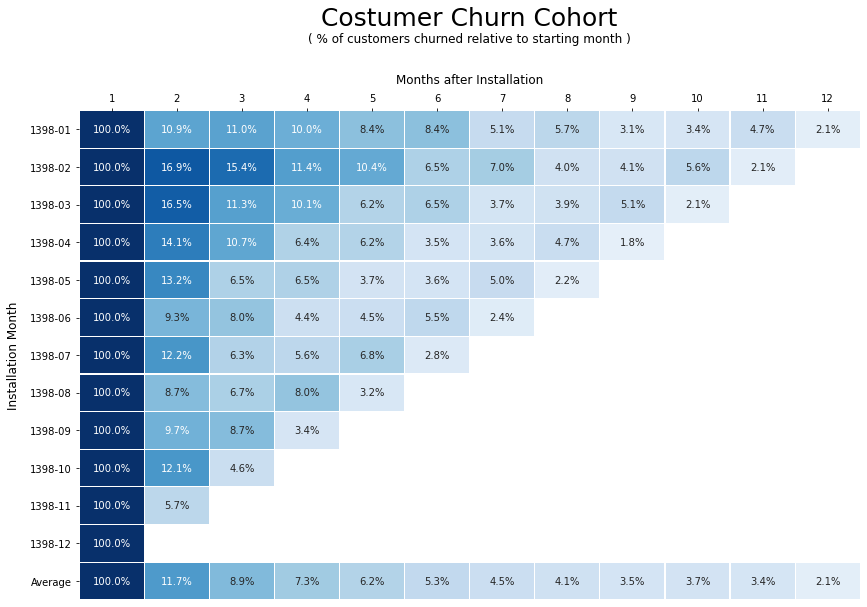

In [20]:
fig, ax = plt.subplots(figsize=(14, 9))
ax = sns.heatmap(cohort_table, annot=True, linewidths=.2, vmin=0.0, vmax=0.2, cmap='Blues', fmt='.1%', cbar=False)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.ylabel('Installation Month', fontsize=12, labelpad=10)
plt.xlabel('Months after Installation', fontsize=12, labelpad=10)
plt.yticks( rotation='360')

plt.title('Costumer Churn Cohort', fontsize=25, pad=85)
plt.suptitle('( % of customers churned relative to starting month )', fontsize=12, x=0.512, y=1)
plt.show()

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='red'>از این جدول نکات زیادی را می توان برداشت کرد از جمله :</font></div>
<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='red'>- مشتریانی که در ماه های اردیبهشت و خرداد برنامه را نصب کرده اند کمترین میزان ریزش را در چند ماه آینده دارند.</font></div>
<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='red'>- بدترین عملکرد از نظر زمانی مربوط به ماه بهمن می باشد که فقط 5 درصد کاربران یعد از تنها یک ماه باقی مانده اند. هچنین بیشترین ریزش برای ماه تیر است که بعد از 9 ماه تنها 2 درصد کاربران باقی می مانند.</font></div>
<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='red'>- به طور کلی مشتریانی که دیرتر برنامه را نصب کرده اند ریزش بیشتری داشته اند برای  مثال برای فروردین ماه پس از 12 ماه به ماندگاری 2 درصدی کاربران می رسیم ولی این مقدار در ماه های آتی یا طی زمان کمتری حاصل می شود مثلا برای مرداد در طی 8 ماه 2 درصد کاربران  باقی می مانند.</font></div>



---
---
<div dir="rtl" lang="fa"><font face="Tahoma" size="5" color='#ff00ff'>بخش دوم</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>
1. متغیرهای مشخص شده رنگ آبی در فرمت بالا را استخراج کرده و از این
متغییرها یک دیتا فریم بسازید. 
</font></div>

In [21]:
log_df = pd.read_csv('SSH.log', names=['log'])
log_df.head()

,log
0,Dec 10 06:55:46 LabSZ sshd[24200]: reverse map...
1,Dec 10 06:55:46 LabSZ sshd[24200]: invalid use...
2,Dec 10 06:55:46 LabSZ sshd[24200]: input_usera...
3,Dec 10 06:55:46 LabSZ sshd[24200]: pam_unix(ss...
4,Dec 10 06:55:46 LabSZ sshd[24200]: pam_unix(ss...


In [22]:
regex = r'^[\w\d ]+[:\d]+|\d+(?=])|(?<=]: ).+'
log_df['Timestamp'] = log_df['log'].apply(lambda x: re.findall(regex, x)[0])
log_df['SessionID'] = log_df['log'].apply(lambda x: re.findall(regex, x)[1]).astype('int64')
log_df['Event']     = log_df['log'].apply(lambda x: re.findall(regex, x)[2])

log_df = log_df[['Timestamp', 'SessionID', 'Event']]
log_df.head()

,Timestamp,SessionID,Event
0,Dec 10 06:55:46,24200,reverse mapping checking getaddrinfo for usern...
1,Dec 10 06:55:46,24200,invalid user username from 173.234.31.186
2,Dec 10 06:55:46,24200,input_userauth_request: invalid user username ...
3,Dec 10 06:55:46,24200,pam_unix(sshd:auth): check pass; user unknown
4,Dec 10 06:55:46,24200,pam_unix(sshd:auth): authentication failure; l...


<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>
2. IP ها و عددهای موجود در Event را با کاراکترهای ثابت 
جایگزین کنید 
</font></div>

In [23]:
log_df['Event'] = log_df['Event'].apply(lambda x: re.sub(r"(\d+\.+)+(\d+)", 'IP', x))
log_df['Event'] = log_df['Event'].apply(lambda x: re.sub(r"\d+", 'NUM', x))
log_df.head()

,Timestamp,SessionID,Event
0,Dec 10 06:55:46,24200,reverse mapping checking getaddrinfo for usern...
1,Dec 10 06:55:46,24200,invalid user username from IP
2,Dec 10 06:55:46,24200,input_userauth_request: invalid user username ...
3,Dec 10 06:55:46,24200,pam_unix(sshd:auth): check pass; user unknown
4,Dec 10 06:55:46,24200,pam_unix(sshd:auth): authentication failure; l...


<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>
a. مشخص کنید چند نوع Event مختلف وجود دارد و توزیع آنها به چه صورت است.
</font></div>

In [24]:
events_count = log_df.Event.nunique()
log_df['event_number'] = log_df.Event.replace(log_df.Event.unique(), np.arange(0, events_count))
events = log_df.groupby(['Event', 'event_number']).count()
events = events.sort_values('Timestamp', ascending=False).reset_index().rename(columns={'Timestamp':'count'}).iloc[:,0:3]
events

,Event,event_number,count
0,Failed password for username from IP port NUM ...,9,140768
1,pam_unix(sshd:auth): authentication failure; l...,8,140701
2,Connection closed by IP [preauth],6,68958
3,Received disconnect from IP: NUM: Bye Bye [pre...,7,46593
4,PAM service(sshd) ignoring max retries; NUM > NUM,13,37963
...,...,...,...
57,error: Received disconnect from IP: NUM: com.j...,57,1
58,Received disconnect from IP: NUM:,43,1
59,error: Received disconnect from IP: NUM: com.j...,56,1
60,error: Received disconnect from IP: NUM: java....,42,1


<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>همانطور که مشاهده می شود 62 ایونت متفاوت داریم که به ترتیب تکرار در جدول بالا مشخص شده اند. به اوینت ها شماره ای نسبت دادیم تا برای رسم نمودار و کارهای آینده استفاده کنیم.</font></div>

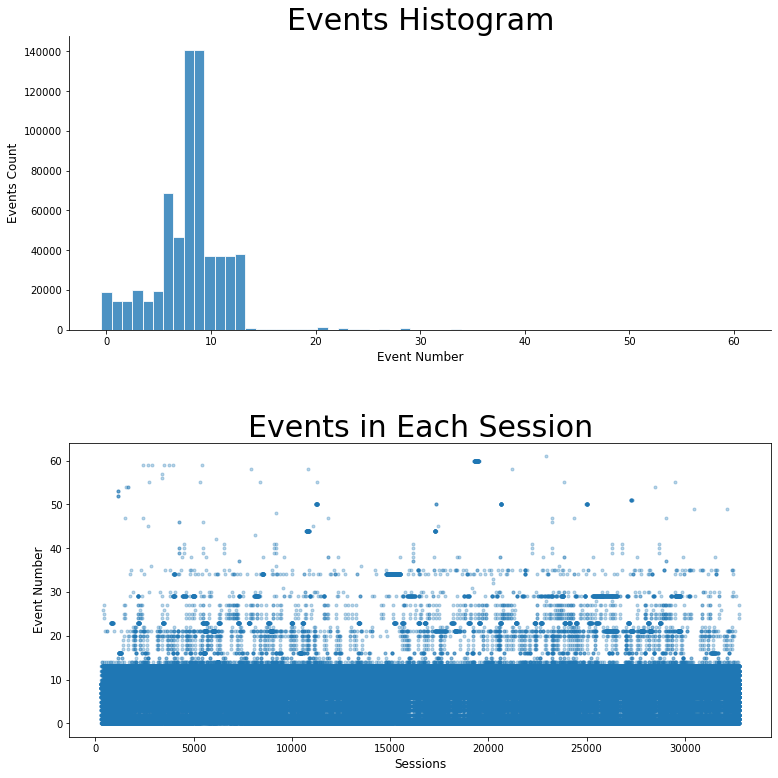

In [25]:
fig, ax = plt.subplots(2, figsize=(12,12))

plt1 = ax[0]
plt1.hist(log_df.event_number, bins=62, ec='w', align='left', alpha=0.8)
plt1.set_xlabel('Event Number', fontsize=12)
plt1.set_ylabel('Events Count', fontsize=12)
plt1.set_title('Events Histogram', fontsize=30)

plt2 = ax[1]
plt2.plot(log_df.SessionID, log_df.event_number, '.', alpha=0.3)
plt2.set_ylabel('Event Number', fontsize=12)
plt2.set_xlabel('Sessions', fontsize=12)
plt2.set_title('Events in Each Session', fontsize=30)

sns.despine(ax=ax[0], right=True)
plt.tight_layout(pad=5);

In [26]:
pd.set_option('display.max_colwidth', None)
display(events[(events.event_number == 8) | (events.event_number == 9)])
pd.reset_option('display.max_colwidth')

,Event,event_number,count
0,Failed password for username from IP port NUM sshNUM,9,140768
1,pam_unix(sshd:auth): authentication failure; logname= uid=NUM euid=NUM tty=ssh ruser= rhost=IP user=username,8,140701


<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>همانطور که در نمودار هیستوگرام  مشخص است ایونت های 0 تا 13 بیشترین تکرار را دارند و تعداد تکرار ایونت های بعدی بسیار کمتر است. همچنین دو ایونت 8 و 9 بیشترین مقدار تکرار را در میان بقیه دارند.</font></div>
<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>با بررسی بیشتر مشاهده می شود که این دو ایونت پر تکرار ( pam_unix(sshd:auth): authentication failure; logname= uid=NUM euid=NUM tty=ssh ruser= rhost=IP user=username	 ) و ( Failed password for username from IP port NUM sshNUM	 ) هستند که ظاهرا مربوط به مشکلات ورود کاربران و پسورد غلط می باشند.</font></div>
<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="2" color='red'>همچنین نتیجه حاصل از هیستوگرام، در اسکترپلات نیز به وضوح قابل مشاهده است. همانطور که مشخص است اکثر session ها ایونت های 0 تا 13 را طی می کنند، ایونت های بعد تا عدد 40 بسیار کمتر رخ می دهند و و ایونت های بعدی تا عدد 62 به ندرت اتفاق می افتند.</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="3" color='#000000'>
b. ماتریس جابجایی بین Event ها را بدست آورده و به صورت هیت مپ رسم کنید.
</font></div>

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>برای هر session ماتریس جابجایی را جداگانه محاسبه کرده و در یک لیست ذخیره می کنیم، سپس ماتریسهای بدست آمده را جمع کرده تا به ماتریس نهایی برسیم.</font></div>
<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>نحوه محاسبه هر ماتریس جابجایی به این صورت است که ابتدا ستونی با نام next_event با یک سطر شیفت دادن شماره ایونت ها به بالا ایجاد می کنیم. این ستون در واقع بیانگر این است که بعد از هر ایونت i چه ایونت j ای رخ می دهد. حال بر اساس ستون های جدید event_number و next_event و تعداد رخداد ایونت ها جدول را گروه بندی می کنیم تا به جدول نهایی برسیم.</font></div>


In [27]:
from tqdm import tqdm

sessions = []
df = log_df[['SessionID', 'event_number']]

for name, group in tqdm(df.groupby('SessionID')):
    group['next_event'] = group['event_number'].shift(periods=-1)
    mtrx = group.groupby(['event_number', 'next_event']).count().unstack()
    sessions.append(mtrx)

100%|███████████████████████████████████████████████████████████████████████████| 32421/32421 [02:30<00:00, 215.78it/s]


In [28]:
matrix = sessions[0]
for i in tqdm(sessions[1:]):
    matrix = matrix.add(i, fill_value=0)
    
matrix = matrix['SessionID']
matrix

100%|███████████████████████████████████████████████████████████████████████████| 32420/32420 [02:31<00:00, 213.63it/s]


next_event,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0
event_number,,,,,,,,,,,,,,,,,,,,,
0,NaN,2152.0,NaN,NaN,NaN,NaN,1.0,3.0,16741.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,14392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,13967.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,14356.0,5496.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,14163.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,NaN,NaN,5496.0,NaN,NaN,1743.0,9787.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,88.0,NaN
6,8661.0,5890.0,NaN,NaN,NaN,NaN,208.0,1.0,43555.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
7,5255.0,2258.0,NaN,NaN,NaN,NaN,83.0,1.0,33087.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140701.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
events_count = log_df.groupby('event_number').count()['Timestamp']
diffrences = pd.DataFrame(events_count).merge(pd.DataFrame(matrix.sum(axis=1)), on='event_number', how='outer')
diffrences[diffrences[0] != diffrences['Timestamp']]

,Timestamp,0
event_number,,
5,19659,19654.0
6,68958,59776.0
7,46593,41112.0
9,140768,140764.0
12,36966,36835.0
13,37963,21150.0
14,838,680.0
15,176,152.0
16,592,473.0


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>با بررسی بیشتر به این نتیجه می رسیم که در بعضی از سطر ها جمع سطر با تعداد رخداد ایونت متناظر برابر نیست. این اتفاق می تواند ناشی از این باشد که آن ایونت در واقع آخرین ایونت session بوده است لذا بعد از آن ایونتی رخ نداده است.</font></div>
<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>برای مثال سطرهای 42 و 59 و 60 و 61 اصلا ایجاد نشده اند زیرا ایونتی بعد از آنها رخ نداده است، یا ستون 32 ایجاد نشده است زیرا همیشه اولین ایونت بوده وقبل از آن ایونتی رخ نداده است. لذا این سطرها و ستون ها را دستی اضافه می کنیم:</font></div>

In [30]:
matrix = pd.concat([matrix, pd.DataFrame({42:[], 59:[], 60:[], 61:[]}).transpose()]).sort_index()
matrix = matrix.join(pd.DataFrame({32.0:[]})).sort_index(axis=1).fillna(0)
matrix

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0
0,0.0,2152.0,0.0,0.0,0.0,0.0,1.0,3.0,16741.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,14392.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,13967.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,14356.0,5496.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,14163.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>در نهایت با تقسیم مقادیر هر سطر بر مجموع آن سطر، ماتریس را normalize می کنیم:</font></div>

In [31]:
final_transition_matrix = matrix.divide(matrix.sum(axis=1), axis=0).fillna(0) *100
final_transition_matrix

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0
0,0.0,11.380824,0.0,0.000000,0.000000,0.000000,0.005288,0.015865,88.53456,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,97.046971,0.000000,0.000000,0.006948,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,72.315132,27.684868,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,98.655614,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
final_transition_matrix.sum(axis=1)

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
      ...  
57    100.0
58    100.0
59      0.0
60      0.0
61      0.0
Length: 62, dtype: float64

<div dir="rtl" lang="fa"><font face="Tahoma" size="2" color='#000000'>همانطور که مشاهده می شود مجموع تمام سطر ها به جز سطرهای اشاره شده که آخرین ایونت سیشن هستند 100 شده است.</font></div>

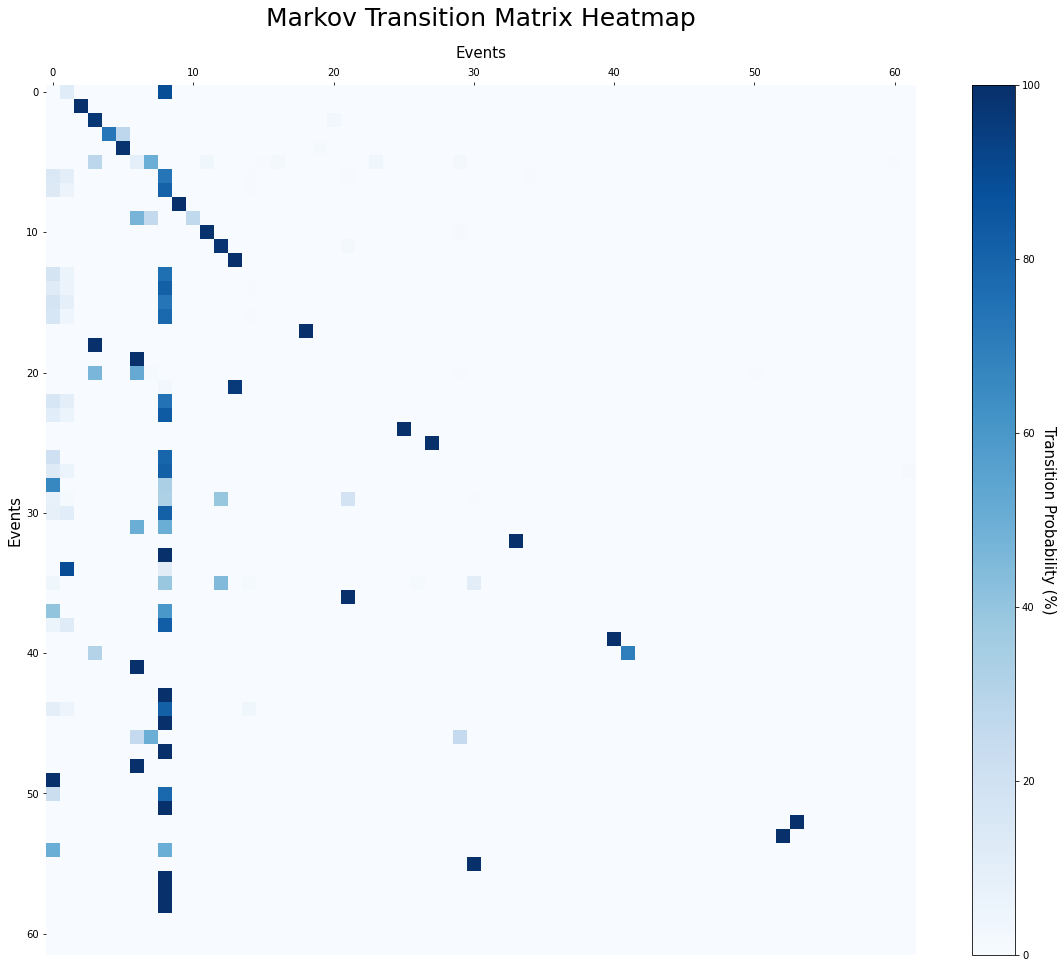

In [33]:
fig, ax = plt.subplots(figsize=(20, 16))
ax1 = ax.imshow(final_transition_matrix, cmap='Blues')

plt.xlabel('Events', fontsize=15, labelpad=10)
plt.ylabel('Events', fontsize=15)
plt.yticks(rotation='360')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

cbar = fig.colorbar(ax1, ax=ax)
cbar.ax.set_ylabel('Transition Probability (%)', rotation=-90, fontsize=15, labelpad=15)

plt.title('Markov Transition Matrix Heatmap', fontsize=25, pad=20)
sns.despine(left=True, right=True, bottom=True);

---
<div dir="rtl" align=center lang="fa"><font face="Tahoma" size="5" color='red'>پایان</font></div>

---